In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors, datasets
from sklearn.datasets import load_digits

In [2]:
#Carrega o data set load_digits
digits = load_digits()
 
#Armazena as imagens para visualizá-las depois
imagens = digits.images

#Arrays 8 x 8 bites
x_data = digits.data
 
#Labels para o treinamento
y_data = digits.target

#mydata = pd.DataFrame(y_data)
#print(mydata.shape)
#print(y_data)

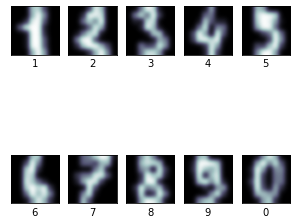

In [3]:
#Figura principal do plot
fig = plt.figure(figsize=(5,5))
 
#Plota cada uma das imagens e seus respectivos rotulos
for x in range(1,11):
    fig.add_subplot(2,5,x,xticks=[],yticks=[])
    plt.imshow(imagens[x],cmap=plt.cm.bone,interpolation='gaussian')
    if x <= 9:
        plt.xlabel(str(x))
    else:
        plt.xlabel(str(0))
plt.show()

In [5]:
from sklearn.model_selection import train_test_split
#Separa conjunto de treino e teste, contendo 200 objetos para teste
x_train,x_test,y_train,y_test = train_test_split(x_data,y_data,test_size = 200)

In [6]:
#Cria o modelo induzido
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [7]:
#Armazena as predições do algoritmo para calcularmos algumas métricas
from sklearn.metrics import accuracy_score
predictions_train = knn.predict(x_train)
print(digits.target_names)
#Calcula a acurácia do treino
accuracy_score(y_train,predictions_train)*100

[0 1 2 3 4 5 6 7 8 9]


99.43644333124608

In [8]:
from sklearn.metrics import confusion_matrix
#Gera a matriz de confusão do treino
confusion_matrix(y_train,predictions_train)

array([[160,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 168,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 157,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 166,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 157,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 150,   0,   0,   0,   1],
       [  0,   0,   0,   0,   0,   0, 158,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 164,   0,   0],
       [  0,   4,   0,   0,   0,   0,   0,   0, 156,   0],
       [  0,   1,   0,   1,   1,   0,   0,   0,   1, 152]], dtype=int64)

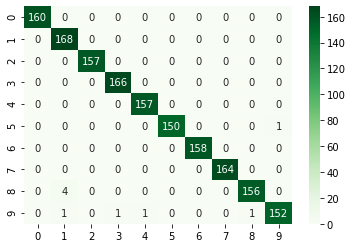

In [9]:
#Gera a matriz de confusão do treino na visualização de HeatMMap
import seaborn as sns
cf = confusion_matrix(y_train,predictions_train)
lbl1=["0","1", "2","3","4","5","6","7","8","9"]
lbl2 = ["0","1", "2","3","4","5","6","7","8","9"]
sns.heatmap(cf,annot=True,cmap="Greens", fmt="d",xticklabels=lbl1,yticklabels=lbl2)
plt.show()

In [10]:
#Calcula a acurácia para o conjunto de teste
predictions = knn.predict(x_test)
accuracy_score(y_test,predictions)*100

97.0

In [11]:
#Gera a matriz de confusão para o conjunto de teste
confusion_matrix(y_test,predictions)

array([[18,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 14,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 20,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 15,  0,  0,  0,  1,  0,  1],
       [ 0,  0,  0,  0, 24,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 29,  1,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 23,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 15,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 14,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  1, 22]], dtype=int64)

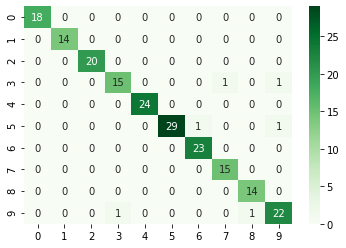

In [12]:
#Gera a matriz de confusão para o conunto de teste na visualização de HeatMMap
cf = confusion_matrix(y_test,predictions)
lbl1=["0","1", "2","3","4","5","6","7","8","9"]
lbl2 = ["0","1", "2","3","4","5","6","7","8","9"]
sns.heatmap(cf,annot=True,cmap="Greens", fmt="d",xticklabels=lbl1,yticklabels=lbl2)
plt.show()

In [13]:
from sklearn.metrics import f1_score
f1_score(y_test,predictions,average='macro')*100

97.04406823542742